In [92]:
import pandas as pd
import glob
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
# set column width to be able to see full text
pd.set_option('display.max_colwidth', 100)

model_rankings = 'monoT5'

base_path = f'../indexing/results/{model_rankings}/'
# all_model_dirs = glob.glob(f'../indexing/results/{model_rankings}/*')
all_model_csvs = glob.glob(f'{base_path}/*.csv') 
plot_path = f'./plots'
if not os.path.exists(plot_path):
    os.makedirs(plot_path)

In [93]:
number_of_answers = 10

model_dfs = []
for model_csv in all_model_csvs:
    df = pd.read_csv(model_csv)
    model_name = model_csv.split("/")[-1].split(".")[0].replace("_rankings", "")
    df["model"] = model_name
    model_dfs.append(df)

all_model_df = pd.concat(model_dfs, ignore_index=True)
all_model_df['is_natural_question'] = all_model_df['query'].str.endswith('?')

In [94]:
all_model_df.describe()

,qid,score,rank,answer_number,weighted_position,num_answer_words,num_matching_words
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,86.040000,-4.558891,49.392688,5.500000,0.291371,228.882187,10.391750
std,32.340436,5.467277,67.260172,2.872371,0.363398,126.610634,15.960082
min,1.000000,-15.175696,0.000000,1.000000,0.000000,1.000000,0.000000
25%,59.000000,-10.558289,0.000000,3.000000,0.000000,117.000000,1.000000
50%,93.500000,-0.294940,8.000000,5.500000,0.049327,237.000000,5.000000
75%,113.000000,-0.009833,89.000000,8.000000,0.615385,331.000000,14.000000
max,132.000000,-0.000891,249.000000,10.000000,0.996000,512.000000,410.000000


In [95]:
# replace na answers with empty string
all_model_df['text'] = all_model_df['text'].fillna('')

In [96]:

# list natural question and non-natural question queries
natural_question_queries = all_model_df[all_model_df['is_natural_question']]['query'].unique()
non_natural_question_queries = all_model_df[~all_model_df['is_natural_question']]['query'].unique()

natural_question_queries, non_natural_question_queries

(array(['Why get episode diagnosed by a doctor as a relapse of multiple sclerosis?',
        'Can I work and study full-time with multiple sclerosis?',
        'How do menopause symptoms relate to multiple sclerosis symptoms?',
        'What are the most common chronic diseases? What effects do chronic diseases have for the society and the individual?',
        'disclosing multiple sclerosis at work, how will colleagues react?',
        'Is a ketogenic / keto diet suitable for people with diabetes?',
        'When will I start to feel better with multiple sclerosis?',
        'Will multiple sclerosis affect my career?',
        'What does multiple sclerosis diagnosis include? What does it change?',
        'What are the most common mental health problems? How can I prevent or manage the most common mental health problems?',
        'What is holistic medicine and what does it include?',
        'How to manage multiple sclerosis?',
        'Does multiple sclerosis relate to sleeping prob

In [97]:
all_model_df['model'].unique()

array(['gpt2-xl', 'chatgpt', 'meta-llama_Llama-2-7b-chat-hf',
       'meta-llama_Llama-2-13b-chat-hf', 'gpt2', 'gpt2-large',
       'tiiuae_falcon-7b-instruct', 'gpt2-medium'], dtype=object)

In [98]:
# rename models to more readable names
names_dict = {
    "gpt2": "GPT-2",
    "gpt2-medium": "GPT-2 Medium",
    "gpt2-large": "GPT-2 Large",
    "gpt2-xl": "GPT-2 XL",
    "tiiuae_falcon-7b-instruct": "Falcon 7B",#
    "meta-llama_Llama-2-7b-chat-hf": "Llama-2 7B",
    "meta-llama_Llama-2-13b-chat-hf": "Llama-2 13B",
    "chatgpt": "ChatGPT"
}
# define colors for models, different shades of same color for different sizes
# gpt2 blue, falcon orange, llama green, chatgpt red
# large models are darker
color_dict = {
    "GPT-2": sns.color_palette("Blues")[0],
    "GPT-2 Medium": sns.color_palette("Blues")[1],
    "GPT-2 Large": sns.color_palette("Blues")[2],
    "GPT-2 XL": sns.color_palette("Blues")[3],
    "Falcon 7B": sns.color_palette("Oranges")[4],
    "Llama-2 7B": sns.color_palette("Greens")[1],
    "Llama-2 13B": sns.color_palette("Greens")[4],
    "ChatGPT": sns.color_palette("Reds")[4]
}

all_model_df['model'] = all_model_df['model'].replace(names_dict)
# order models
order = [
    "GPT-2",
    "GPT-2 Medium",
    "GPT-2 Large",
    "GPT-2 XL",
    "Falcon 7B",
    "Llama-2 7B",
    "Llama-2 13B",
    "ChatGPT",
]
all_model_df['model'] = pd.Categorical(all_model_df['model'], order)


/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


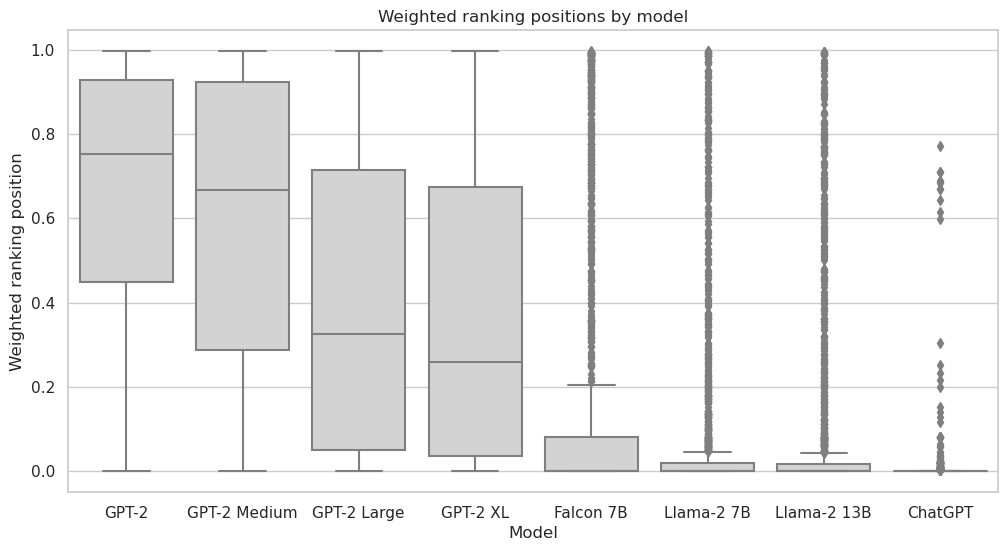

In [99]:
# boxplot of weighted_position
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 6))

# use color_dict to color models
ax = sns.boxplot(x="model", y="weighted_position", data=all_model_df, color="lightgray")
ax.set_title(f'Weighted ranking positions by model')
ax.set_xlabel('Model')
ax.set_ylabel('Weighted ranking position')
plt.savefig(f'{plot_path}/weighted_position_boxplot.pdf', bbox_inches='tight')
plt.show()

In [148]:
# are the ranking differences between Llama-2 7b and 13b significant?

from scipy.stats import wilcoxon
import numpy as np

llama_7b_df = all_model_df[all_model_df['model'] == 'Llama-2 7B']
llama_13b_df = all_model_df[all_model_df['model'] == 'Llama-2 13B']

# wilcoxon test
wilcoxon(llama_7b_df['weighted_position'], llama_13b_df['weighted_position'])

WilcoxonResult(statistic=193116.0, pvalue=0.5405638094290862)

In [100]:
# table with the statistics from the previous boxplot
all_model_df.groupby('model')['weighted_position'].describe()

/tmp/ipykernel_33835/2536731562.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_model_df.groupby('model')['weighted_position'].describe()


,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
GPT-2,2000.0,0.660848,0.305756,0.0,0.449256,0.753282,0.927536,0.996000
GPT-2 Medium,2000.0,0.590230,0.342645,0.0,0.287091,0.668142,0.924051,0.996000
GPT-2 Large,2000.0,0.399873,0.345718,0.0,0.050475,0.326028,0.714286,0.995434
GPT-2 XL,2000.0,0.366163,0.342939,0.0,0.035466,0.258286,0.674944,0.995536
Falcon 7B,2000.0,0.146815,0.291233,0.0,0.000000,0.000000,0.082353,0.995968
Llama-2 7B,2000.0,0.079182,0.206323,0.0,0.000000,0.000000,0.018606,0.995968
Llama-2 13B,2000.0,0.081779,0.210085,0.0,0.000000,0.000000,0.017425,0.994924
ChatGPT,2000.0,0.006078,0.052225,0.0,0.000000,0.000000,0.000000,0.771605


/tmp/ipykernel_33835/1571089926.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model_weighted_position_df = all_model_df.groupby('model')['weighted_position'].mean().reset_index()
/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


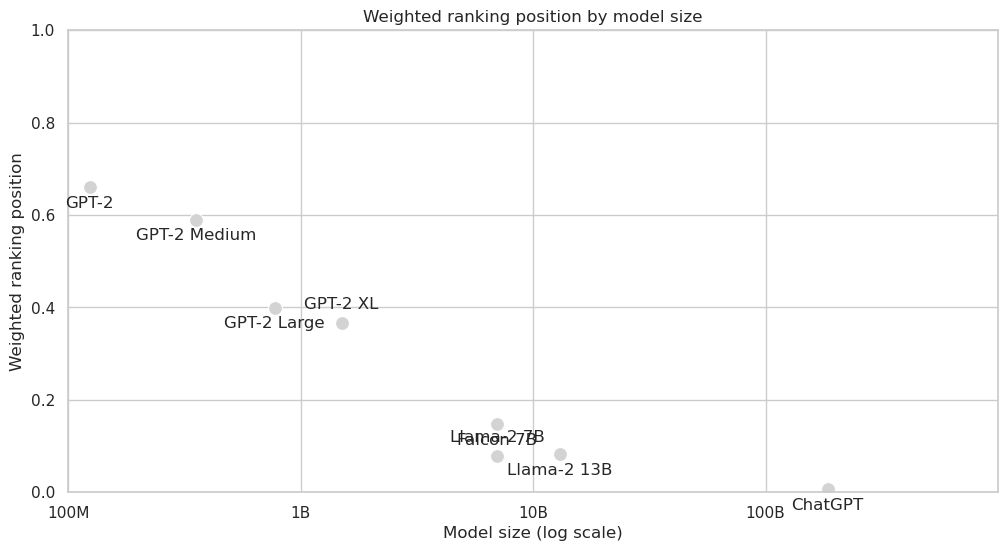

In [101]:
"""
124M
355M
774M
1.5B
7B
7B
13B
185B
"""
# group by model name and get mean weighted position, add model size
model_size_dict = {
    "GPT-2": 124000000,
    "GPT-2 Medium": 355000000,
    "GPT-2 Large": 774000000,
    "GPT-2 XL": 1500000000,
    "Falcon 7B": 7000000000,
    "Llama-2 7B": 7000000000,
    "Llama-2 13B": 13000000000,
    "ChatGPT": 185000000000
}
model_weighted_position_df = all_model_df.groupby('model')['weighted_position'].mean().reset_index()
model_weighted_position_df['model_size'] = model_weighted_position_df['model'].replace(model_size_dict)
model_weighted_position_df = model_weighted_position_df.sort_values(by='model_size')

# plot weighted position vs model size, draw line to show the trend
# x axis is log scaled
# model names appear directly above the points
fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.scatterplot(x="model_size", y="weighted_position", data=model_weighted_position_df, color="lightgray", s=100)

ax.set_title(f'Weighted ranking position by model size')
ax.set_xlabel('Model size (log scale)')
ax.set_ylabel('Weighted ranking position')
ax.set_xscale('log')
ax.set_xticks([ 1e8, 1e9, 1e10, 1e11])
ax.set_xticklabels(['100M', '1B', '10B', '100B'])
ax.set_ylim(0, 1)

ax.set_xlim(1e8, 1e12)
for i, txt in enumerate(model_weighted_position_df['model']):
    # move llama-2 7B and GPT-2 XL below the point
    if txt == 'Llama-2 7B' or txt == 'GPT-2 XL':
        ax.annotate(txt, (model_weighted_position_df['model_size'][i], model_weighted_position_df['weighted_position'][i]), xytext=(0, 10), textcoords='offset points', ha='center')
    else:
        ax.annotate(txt, (model_weighted_position_df['model_size'][i], model_weighted_position_df['weighted_position'][i]), xytext=(0, -15), textcoords='offset points', ha='center')
plt.savefig(f'{plot_path}/weighted_position_vs_model_size.pdf', bbox_inches='tight')
plt.show()

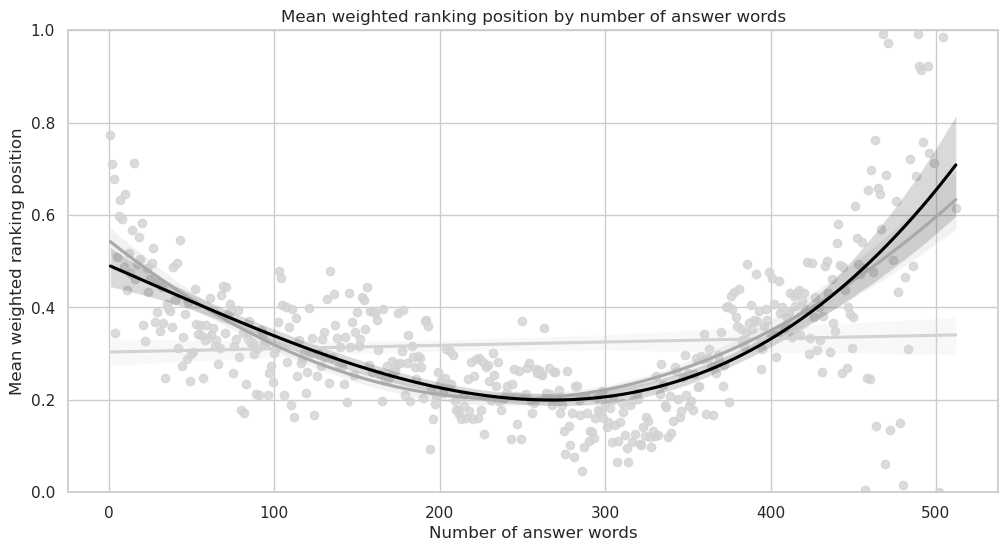

In [102]:
# group by number of answer words and get mean weighted position
num_answer_words_df = all_model_df.groupby('num_answer_words')['weighted_position'].mean().reset_index()
num_answer_words_df.to_csv(f'{plot_path}/num_answer_words.csv', index=False)

# plot number of answer words vs weighted position, draw line to show the trend
fig, ax = plt.subplots(figsize=(12, 6))

# ax = sns.scatterplot(x="num_answer_words", y="weighted_position", data=all_model_df, color="lightgray", s=100)
# color of regression line is black, spread of points is darkgray
# draw order 1, 2 and 3 regression lines
ax = sns.regplot(x="num_answer_words", y="weighted_position", data=num_answer_words_df, scatter=True, color="lightgray", line_kws={'color': 'lightgray'}, order=1)
ax = sns.regplot(x="num_answer_words", y="weighted_position", data=num_answer_words_df, scatter=False, color="darkgray", line_kws={'color': 'darkgray'}, order=2)
ax = sns.regplot(x="num_answer_words", y="weighted_position", data=num_answer_words_df, scatter=False, color="darkgray", line_kws={'color': 'black'}, order=3)

ax.set_title(f'Mean weighted ranking position by number of answer words')
ax.set_xlabel('Number of answer words')
ax.set_ylabel('Mean weighted ranking position')
ax.set_ylim(0, 1)
plt.savefig(f'{plot_path}/weighted_position_vs_num_answer_words.pdf', bbox_inches='tight')
plt.show()

In [164]:
# number of answers with more than 400 words by model
over_400 = all_model_df[all_model_df['num_answer_words'] > 350].groupby('model')['query'].count()
# get total number of over 400 answers
total = all_model_df[all_model_df['num_answer_words'] > 350]['query'].count()
# calculate percentage
# compare GPT-2 models to remaining models, summing up the values
over_400_gpt2 = over_400[over_400.index.str.contains('GPT-2')].sum()
over_400_other = over_400.sum() - over_400_gpt2
# percentages
print(f'GPT-2: {over_400_gpt2/total*100:.2f}%')
print(f'Other: {over_400_other/total*100:.2f}%')
print(f'Total: {total}')

GPT-2: 85.39%
Other: 14.61%
Total: 3271


/tmp/ipykernel_33835/3020690286.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  over_400 = all_model_df[all_model_df['num_answer_words'] > 350].groupby('model')['query'].count()


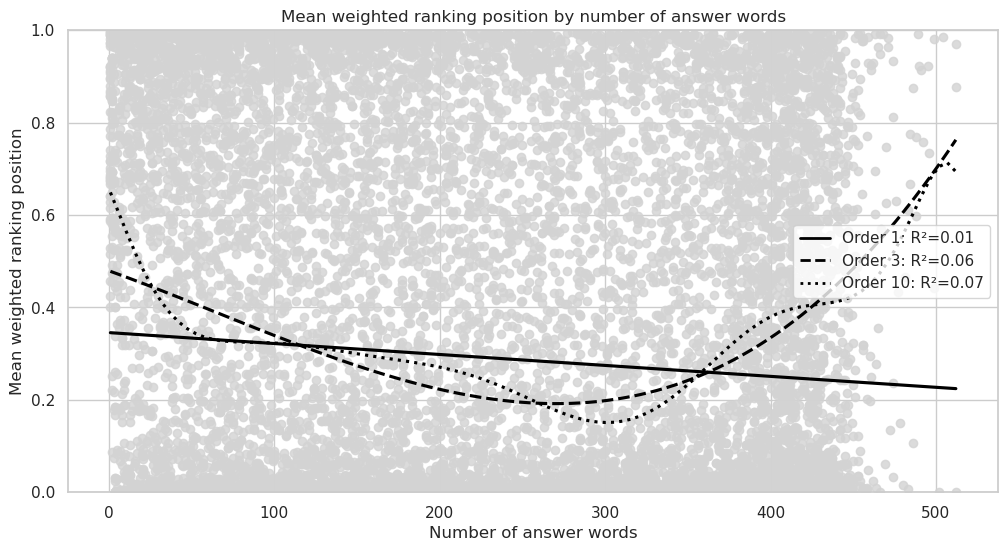

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from numpy.polynomial.polynomial import Polynomial
from matplotlib.lines import Line2D 

# Plot setup
fig, ax = plt.subplots(figsize=(12, 6))
num_answer_words_df = all_model_df
# Data for regression lines
X = num_answer_words_df['num_answer_words'].values
y = num_answer_words_df['weighted_position'].values

# Colors and line styles for different orders
colors = ['black', 'black', 'black']
line_styles = ['-', '--', ':']
orders = [1, 3, 10]
r2_values = []

# Plotting regression lines and calculating R² values
for order, color, line_style in zip(orders, colors, line_styles):
    sns.regplot(x="num_answer_words", y="weighted_position", data=num_answer_words_df, scatter=True if order == 1 else False, 
                color='lightgray', line_kws={'color': color, 'linestyle': line_style}, order=order, ax=ax, ci=None)
    p = Polynomial.fit(X, y, order)
    r2 = r2_score(y, p(X))
    r2_values.append(f'Order {order}: R²={r2:.2f}')

# Custom legend handles
legend_handles = [Line2D([0], [0], color=color, lw=2, linestyle=line_style) for color, line_style in zip(colors, line_styles)]
# Adding a legend
ax.legend(legend_handles, r2_values)

# Setting title, labels, and axes limits
ax.set_title('Mean weighted ranking position by number of answer words')
ax.set_xlabel('Number of answer words')
ax.set_ylabel('Mean weighted ranking position')
ax.set_ylim(0, 1)

# Saving the plot
plt.savefig(f'{plot_path}/weighted_position_vs_num_answer_words.pdf', bbox_inches='tight')
plt.show()


In [104]:
# print text with num words < 10 and weighted position < 0.1 of answer

short_but_good_df = all_model_df[(all_model_df['num_answer_words'] < 20)]

# correlation between weighted position and num_matching_words
from scipy.stats import pearsonr
pearsonr(short_but_good_df['weighted_position'], short_but_good_df['num_matching_words'])

PearsonRResult(statistic=-0.6363402263485658, pvalue=3.9581872206041333e-59)

In [105]:
short_but_good_df

,docno,text,qid,query,score,rank,prompt,answer_number,weighted_position,num_answer_words,num_matching_words,model,is_natural_question
90,gpt2-xl_113,\x70\xe1\xd8\xa0\xc9\xb2\xba\xf5\xb6\xbf\xb3\x92\x93\x94\x95\x96\x97\x98\x99\x7a\xff\xff\xe9\x8f...,113,asthma and covid,-14.271252,218,multimedqa,2,0.995434,1,0,GPT-2 XL,False
311,gpt2-xl_131,"For more questions about the internet or your own life, check out our web site at http://www.hea...",131,exercises for better posture,-13.924685,77,multimedqa,7,0.905882,17,1,GPT-2 XL,False
440,gpt2-xl_113,Your answer is incorrect \nAnswer: cough \nAnswer: bronchitis \nAnswer: emphysema \nAnswer: chro...,113,asthma and covid,-13.066863,216,multimedqa,9,0.986301,16,0,GPT-2 XL,False
466,gpt2-xl_98,\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/\o/...,98,most common complications in pregnancy,-13.398022,176,multimedqa,10,0.988764,1,0,GPT-2 XL,False
579,gpt2-xl_127,yes.Q: how do I get a copy of the current edition of E&E?A: http://www.ece.unsw.edu.au/~jtaylor/...,127,glasses for computer,-13.405133,65,q,2,0.984848,14,0,GPT-2 XL,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15745,gpt2-medium_53,a form of therapy which aims to reduce the impact and negative feelings that can arise from emot...,53,what is psychotherapy?,-5.534614,18,question,5,0.100000,19,0,GPT-2 Medium,True
15888,gpt2-medium_116,yes \N,116,outcome prostate cancer,-12.943439,227,question,8,0.915323,2,0,GPT-2 Medium,False
15939,gpt2-medium_58,No.,58,Risk to develop multiple sclerosis,-12.278367,148,question,9,0.640693,1,0,GPT-2 Medium,False
15946,gpt2-medium_108,persistent and prolonged weight loss/constipation long-term obesity response metabolic syndrome,108,chronic diarrhea short-term memory sweating inability to regulate body temperature heart palpita...,-9.377596,31,question,9,0.525424,10,0,GPT-2 Medium,False


In [106]:
import re
# function to check if text contains only words that are in the query
def contains_only_query_words(text, query):
    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    query = re.sub(r'[^\w\s]', '', query)
    text_words = text.split()
    query_words = query.split()
    for text_word in text_words:
        if text_word not in query_words:
            return False
    return True

# check if text contains only words that are in the query
all_model_df['contains_only_query_words'] = all_model_df.apply(lambda row: contains_only_query_words(row['text'], row['query']), axis=1)
# print where true
all_model_df[all_model_df['contains_only_query_words']]

,docno,text,qid,query,score,rank,prompt,answer_number,weighted_position,num_answer_words,num_matching_words,model,is_natural_question,contains_only_query_words
1147,gpt2-xl_45,,45,Can diabetes be cured?,-12.471869,113,no_prompt,3,0.896825,1,0,GPT-2 XL,True,True
1388,gpt2-xl_116,.,116,outcome prostate cancer,-11.815044,218,no_prompt,8,0.879032,1,0,GPT-2 XL,False,True
6013,meta-llama_Llama-2-13b-chat-hf_132,...,132,headpats scalp psoriasis,-11.014346,87,multimedqa,1,0.696000,1,0,Llama-2 13B,False,True
7108,meta-llama_Llama-2-13b-chat-hf_62,,62,"disclosing multiple sclerosis at work, how will colleagues react?",-11.637971,150,no_prompt,3,0.681818,1,0,Llama-2 13B,True,True
7156,meta-llama_Llama-2-13b-chat-hf_1,,1,What are the most common chronic diseases? What effects do chronic diseases have for the society...,-10.277918,151,no_prompt,4,0.616327,1,0,Llama-2 13B,True,True
9117,gpt2_8,.,8,best apps daily activity exercise diabetes,-11.504283,125,no_prompt,3,0.529661,1,0,GPT-2,False,True
9123,gpt2_114,.,114,borderline personality disorder symptoms,-11.864604,85,no_prompt,3,0.787037,1,0,GPT-2,False,True
9387,gpt2_79,,79,Can I pass multiple sclerosis to other family members?,-12.168976,164,no_prompt,8,0.716157,1,0,GPT-2,True,True
11202,gpt2-large_83,,83,Why get episode diagnosed by a doctor as a relapse of multiple sclerosis?,-12.317680,226,no_prompt,5,0.965812,1,0,GPT-2 Large,True,True
12541,tiiuae_falcon-7b-instruct_130,neck and shoulder stretches.,130,neck and shoulder stretches,-0.004420,0,q,1,0.000000,4,3,Falcon 7B,False,True


In [107]:
# get all answers with weigthted position < 0.1 by GPT-2 and prompt is no_prompt
gpt2_df = all_model_df[(all_model_df['weighted_position'] < 0.1) &  (all_model_df['model'].str.contains('GPT-2'))]
gpt2_df

,docno,text,qid,query,score,rank,prompt,answer_number,weighted_position,num_answer_words,num_matching_words,model,is_natural_question,contains_only_query_words
1,gpt2-xl_109,Ehlers Danlos Syndrome (EDS) is an inherited disorder that causes connective tissue (fatty tissu...,109,ehlers danlos syndrome POTS nausea stomach pain,-4.967661,2,multimedqa,1,0.050000,389,3,GPT-2 XL,False,False
6,gpt2-xl_1,Chronic disease is an umbrella term that includes any number of medical conditions and symptoms ...,1,What are the most common chronic diseases? What effects do chronic diseases have for the society...,-0.057446,1,multimedqa,1,0.004082,133,14,GPT-2 XL,True,False
7,gpt2-xl_105,The wisdom teeth do not cut the gums in order to relieve pain; they simply grow out of the gums ...,105,wisdom tooth cuts gum pain,-0.148934,1,multimedqa,1,0.012658,146,1,GPT-2 XL,False,False
8,gpt2-xl_62,It depends on the individual's situation and attitude. Sometimes they may not realize that you h...,62,"disclosing multiple sclerosis at work, how will colleagues react?",-0.865320,16,multimedqa,1,0.072727,413,5,GPT-2 XL,True,False
9,gpt2-xl_35,"A ketogenic diet is not appropriate for people with diabetes.\r\n\n""People who have type 2 diabe...",35,Is a ketogenic / keto diet suitable for people with diabetes?,-0.108126,4,multimedqa,1,0.025806,340,18,GPT-2 XL,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15977,gpt2-medium_55,"Take the following steps and see if you can live with them each time.\nHere's what I do, when my...",55,How to manage multiple sclerosis?,-0.149227,9,question,10,0.036585,152,0,GPT-2 Medium,True,False
15983,gpt2-medium_57,"Multiple Sclerosis is a progressive disorder characterized by abnormal body functions, such as i...",57,multiple sclerosis stages phases,-7.647964,10,question,10,0.048309,240,2,GPT-2 Medium,False,False
15985,gpt2-medium_93,"Yes, it does. It is due partly - but also completely-to the sleep disorders that we all experien...",93,Does multiple sclerosis relate to sleeping problems and forgetfulness in older people?,-0.009964,0,question,10,0.000000,436,5,GPT-2 Medium,True,False
15987,gpt2-medium_79,No. But it is possible for some people with MS (including those affected by the disease) who hav...,79,Can I pass multiple sclerosis to other family members?,-0.055091,0,question,10,0.000000,113,1,GPT-2 Medium,True,False


In [108]:
# calculate if correlation between number of answer words and weighted position is significant
import scipy.stats as stats
stats.pearsonr(all_model_df['num_answer_words'], all_model_df['weighted_position'])

PearsonRResult(statistic=-0.08253016330476154, pvalue=1.3702332975872614e-25)

In [109]:
all_model_df['num_answer_words'].describe()

count    16000.000000
mean       228.882187
std        126.610634
min          1.000000
25%        117.000000
50%        237.000000
75%        331.000000
max        512.000000
Name: num_answer_words, dtype: float64

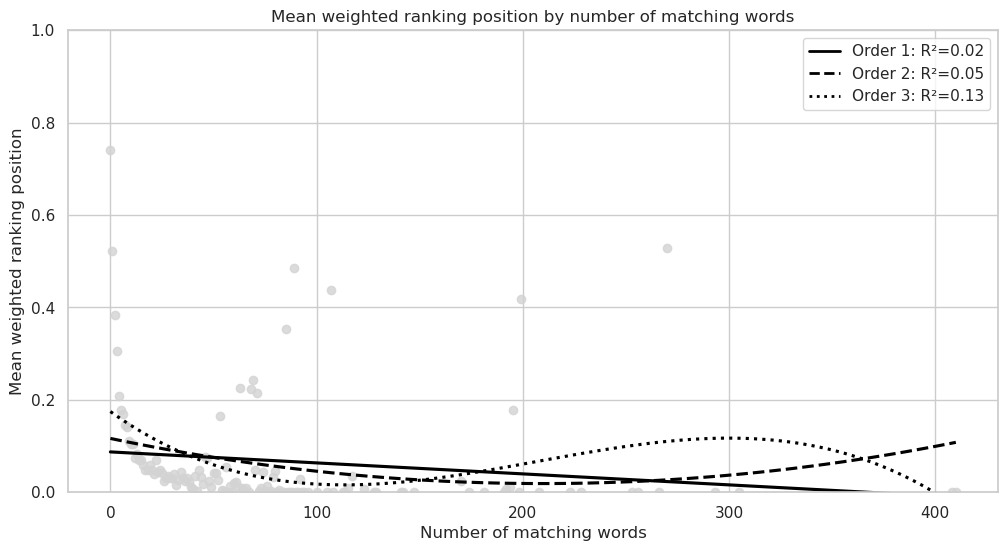

In [110]:
# generate new dataframe grouped by number of matching words with mean weighted position, only keep groups with more than 10 rows
num_matching_words_df = all_model_df.groupby('num_matching_words').agg({'weighted_position': 'mean', 'docno': 'count'}).reset_index()


num_matching_words_df.to_csv(f'{plot_path}/num_matching_words.csv', index=False)

# Plot setup
fig, ax = plt.subplots(figsize=(12, 6))

# Data for regression lines
X = num_matching_words_df['num_matching_words'].values
y = num_matching_words_df['weighted_position'].values

# Colors and line styles for different orders
colors = ['black', 'black', 'black', 'black']
line_styles = ['-', '--', ':', '-.']
orders = [1, 2, 3]
r2_values = []

# Plotting regression lines and calculating R² values
for order, color, line_style in zip(orders, colors, line_styles):
    sns.regplot(x="num_matching_words", y="weighted_position", data=num_matching_words_df, scatter=True if order == 1 else False, 
                color='lightgray', line_kws={'color': color, 'linestyle': line_style}, order=order, ax=ax, ci=None)
    p = Polynomial.fit(X, y, order)
    r2 = r2_score(y, p(X))
    r2_values.append(f'Order {order}: R²={r2:.2f}')

# Custom legend handles
legend_handles = [Line2D([0], [0], color=color, lw=2, linestyle=line_style) for color, line_style in zip(colors, line_styles)]
# Adding a legend
ax.legend(legend_handles, r2_values)

# Setting title, labels, and axes limits
ax.set_title('Mean weighted ranking position by number of matching words')
ax.set_xlabel('Number of matching words')
ax.set_ylabel('Mean weighted ranking position')
ax.set_ylim(0, 1)

# Saving the plot
plt.savefig(f'{plot_path}/weighted_position_vs_num_matching_words.pdf', bbox_inches='tight')
plt.show()

In [111]:
# correlation between number of matching words and weighted position
stats.pearsonr(all_model_df['num_matching_words'], all_model_df['weighted_position'])

PearsonRResult(statistic=-0.3845874297829366, pvalue=0.0)

/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


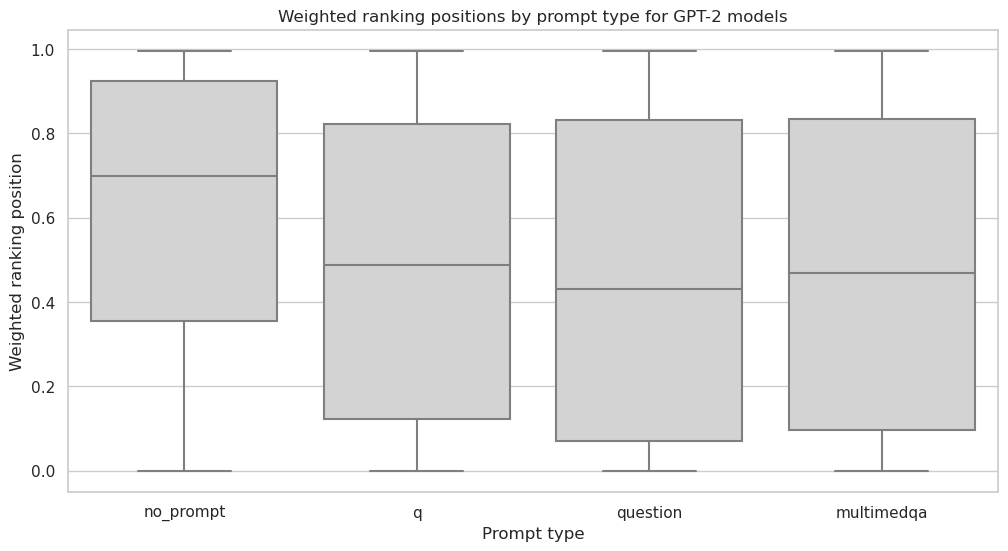

In [112]:
# boxplot of weighted position by prompt type

fig, ax = plt.subplots(figsize=(12, 6))
order = [
    "no_prompt",
    "q",
    "question",
    "multimedqa"
]


# only include models with GPT-2 in name
ax = sns.boxplot(x="prompt", y="weighted_position", data=all_model_df[all_model_df['model'].str.contains("GPT-2")], order=order, color="lightgray")
ax.set_title(f'Weighted ranking positions by prompt type for GPT-2 models')

ax.set_xlabel('Prompt type')
ax.set_ylabel('Weighted ranking position')
plt.savefig(f'{plot_path}/weighted_position_boxplot_by_prompt.pdf', bbox_inches='tight')
plt.show()


/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


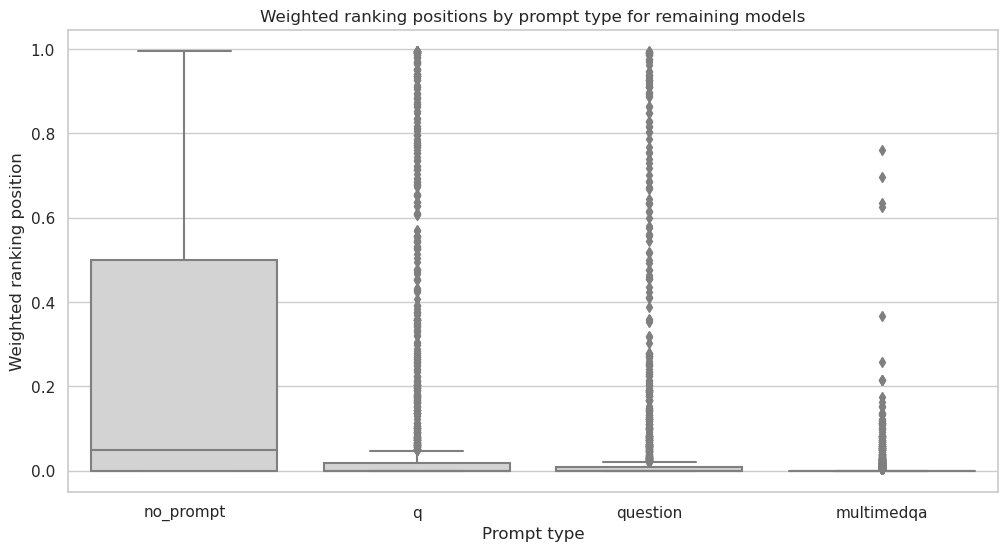

In [113]:
# second plot with remaining models
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x="prompt", y="weighted_position", data=all_model_df[all_model_df['model'].str.contains("Llama") | all_model_df['model'].str.contains("Falcon") ], order=order, color="lightgray")
ax.set_title(f'Weighted ranking positions by prompt type for remaining models')
ax.set_xlabel('Prompt type')
ax.set_ylabel('Weighted ranking position')
plt.savefig(f'{plot_path}/weighted_position_boxplot_by_prompt_remaining.pdf', bbox_inches='tight')
plt.show()

In [114]:
# table of median rank by model, depending on prompt type
weigthed_position_by_prompt = all_model_df.groupby(['model', 'prompt'])['weighted_position'].mean().unstack()
# order columns
weigthed_position_by_prompt = weigthed_position_by_prompt[order]
# 3 decimals
weigthed_position_by_prompt = weigthed_position_by_prompt.round(3)
weigthed_position_by_prompt.to_csv(f'{plot_path}/weighted_position_by_prompt.csv') 

/tmp/ipykernel_33835/2794833134.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weigthed_position_by_prompt = all_model_df.groupby(['model', 'prompt'])['weighted_position'].mean().unstack()


/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


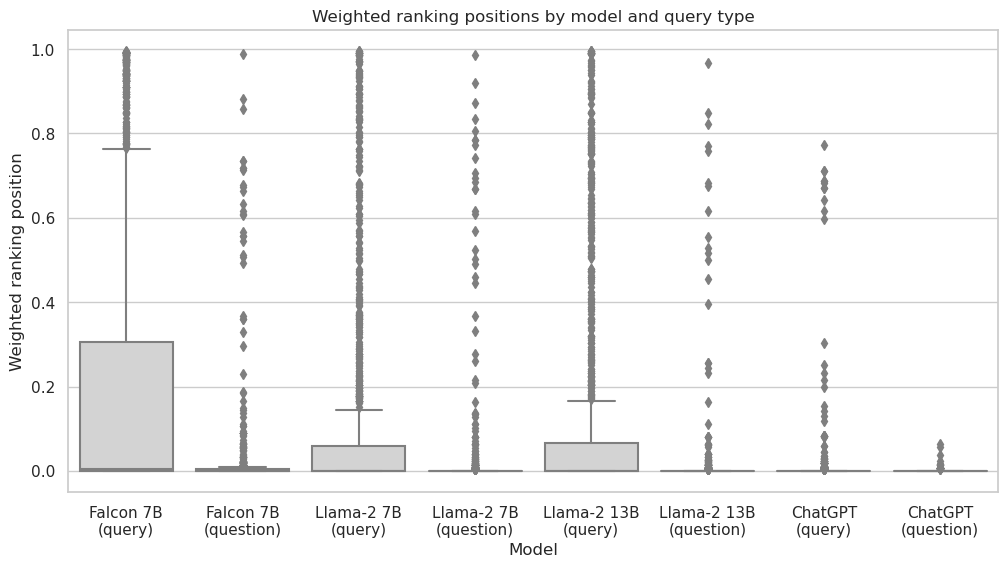

In [115]:
# same boxplot again, but question vs non-question
query_question_df = all_model_df[['docno', 'model', 'weighted_position', 'is_natural_question']]
# drop gpt 2 based model
query_question_df = query_question_df[~query_question_df['model'].str.contains("GPT-2")]

# add query type identifier to model name
# model back to string
query_question_df['model'] = query_question_df['model'].astype(str)
query_question_df['model'] = query_question_df['model'] +  query_question_df['is_natural_question'].map({True: '\n(question)', False: '\n(query)'})
# define same order as before on remaining models
order_with_question = [
    "Falcon 7B\n(query)",
    "Falcon 7B\n(question)",
    "Llama-2 7B\n(query)",
    "Llama-2 7B\n(question)",
    "Llama-2 13B\n(query)",
    "Llama-2 13B\n(question)",
    "ChatGPT\n(query)",
    "ChatGPT\n(question)",
]
query_question_df['model'] = pd.Categorical(query_question_df['model'], order_with_question)
# same color dict as before, adapted to new model names
color_with_question_dict = {
    "Falcon 7B\n(question)": sns.color_palette("Oranges")[1],
    "Falcon 7B\n(query)": sns.color_palette("Oranges")[4],
    "Llama-2 7B\n(question)": sns.color_palette("Greens")[2],
    "Llama-2 7B\n(query)": sns.color_palette("Greens")[1],
    "Llama-2 13B\n(question)": sns.color_palette("Greens")[5],
    "Llama-2 13B\n(query)": sns.color_palette("Greens")[4],
    "ChatGPT\n(question)": sns.color_palette("Reds")[5],
    "ChatGPT\n(query)": sns.color_palette("Reds")[4],
}
# add textures
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x="model", y="weighted_position", data=query_question_df, color="lightgray")
ax.set_title(f'Weighted ranking positions by model and query type')
ax.set_xlabel('Model')
ax.set_ylabel('Weighted ranking position')

plt.savefig(f'{plot_path}/weighted_position_boxplot_by_model_and_question.pdf', bbox_inches='tight')
plt.show()


/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


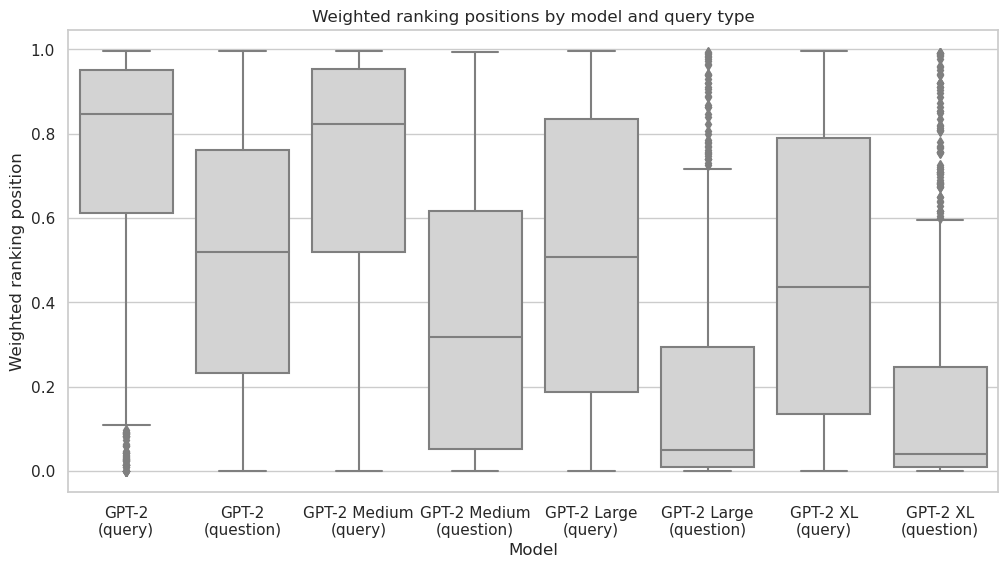

In [116]:

# same boxplot again, but question vs non-question
query_question_df = all_model_df[['docno', 'model', 'weighted_position', 'is_natural_question']]
# drop non gpt 2 based model
query_question_df = query_question_df[query_question_df['model'].str.contains("GPT-2")]

# add query type identifier to model name
# model back to string
query_question_df['model'] = query_question_df['model'].astype(str)
query_question_df['model'] = query_question_df['model'] +  query_question_df['is_natural_question'].map({True: '\n(question)', False: '\n(query)'})
# define same order as before on remaining models
order_with_question = [
    "GPT-2\n(query)",
    "GPT-2\n(question)",
    "GPT-2 Medium\n(query)",
    "GPT-2 Medium\n(question)",
    "GPT-2 Large\n(query)",
    "GPT-2 Large\n(question)",
    "GPT-2 XL\n(query)",
    "GPT-2 XL\n(question)",
]
query_question_df['model'] = pd.Categorical(query_question_df['model'], order_with_question)
# same color dict as before, adapted to new model names

# add textures
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x="model", y="weighted_position", data=query_question_df, color="lightgray")
ax.set_title(f'Weighted ranking positions by model and query type')
ax.set_xlabel('Model')
ax.set_ylabel('Weighted ranking position')

plt.savefig(f'{plot_path}/weighted_position_boxplot_by_model_and_question_gpt2.pdf', bbox_inches='tight')
plt.show()

In [117]:
# table with the statistics from the previous boxplot, for all models
all_model_df.groupby(['model', 'is_natural_question'])['weighted_position'].describe()

/tmp/ipykernel_33835/3754037353.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_model_df.groupby(['model', 'is_natural_question'])['weighted_position'].describe()


count      mean       std  min       25%  \
model        is_natural_question                                              
GPT-2        False                1320.0  0.744233  0.264810  0.0  0.611812   
             True                  680.0  0.498982  0.315042  0.0  0.232323   
GPT-2 Medium False                1320.0  0.704529  0.294862  0.0  0.519533   
             True                  680.0  0.368355  0.319461  0.0  0.052205   
GPT-2 Large  False                1320.0  0.505367  0.334371  0.0  0.187594   
             True                  680.0  0.195092  0.266563  0.0  0.010101   
GPT-2 XL     False                1320.0  0.461982  0.341643  0.0  0.135320   
             True                  680.0  0.180163  0.258857  0.0  0.010101   
Falcon 7B    False                1320.0  0.206217  0.332151  0.0  0.000000   
             True                  680.0  0.031505  0.123349  0.0  0.000000   
Llama-2 7B   False                1320.0  0.104841  0.232862  0.0  0.000000   
             True                  680.0  0.029373  0.127381  0.0  0.000000   
Llama-2 13B  False                1320.0  0.114785  0.242549  0.0  0.000000   
             True                  680.0  0.017708  0.097098  0.0  0.000000   
ChatGPT      False                1320.0  0.008844  0.064049  0.0  0.000000   
             True                  680.0  0.000707  0.004144  0.0  0.000000   

                                       50%       75%       max  
model        is_natural_question                                
GPT-2        False                0.847258  0.950673  0.996000  
             True                 0.520000  0.761444  0.996000  
GPT-2 Medium False                0.821429  0.952000  0.996000  
             True                 0.318355  0.617036  0.994444  
GPT-2 Large  False                0.507828  0.833333  0.995434  
             True                 0.049064  0.294425  0.994444  
GPT-2 XL     False                0.436169  0.788776  0.995536  
             True                 0.038881  0.245192  0.991453  
Falcon 7B    False                0.004566  0.306006  0.995968  
             True                 0.000000  0.004132  0.988000  
Llama-2 7B   False                0.000000  0.060038  0.995968  
             True                 0.000000  0.000000  0.986364  
Llama-2 13B  False                0.000000  0.067141  0.994924  
             True                 0.000000  0.000000  0.967480  
ChatGPT      False                0.000000  0.000000  0.771605  
             True                 0.000000  0.000000  0.063492

/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jonas/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


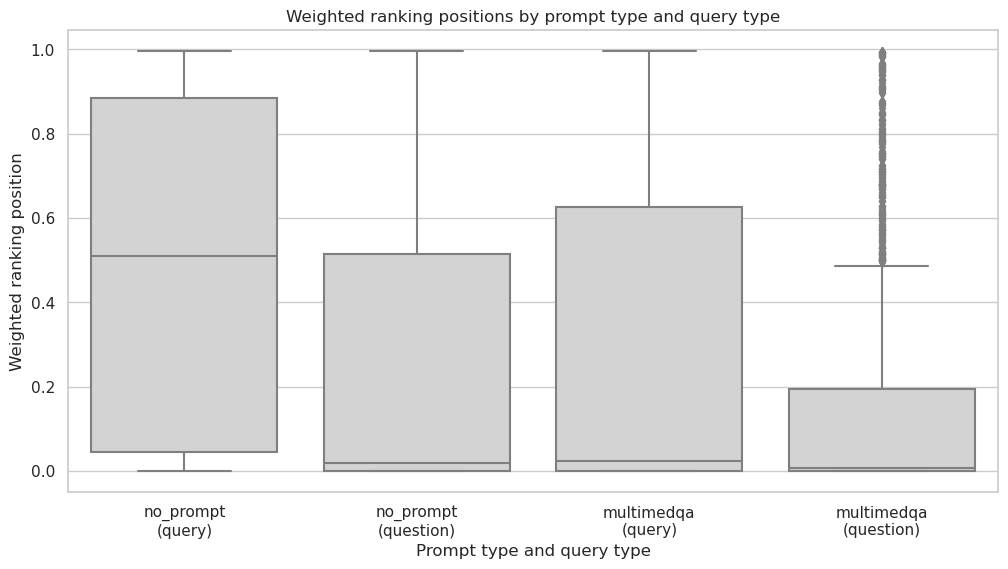

In [118]:
# boxplot of query vs. question type queries for no prompt and multimedqa
query_prompt_df = all_model_df
# merge prompt type and question type columns
query_prompt_df['query_prompt'] = query_prompt_df['prompt'] + query_prompt_df['is_natural_question'].map({True: '\n(question)', False: '\n(query)'})

order = [
    "no_prompt\n(query)",
    "no_prompt\n(question)",
    "multimedqa\n(query)",
    "multimedqa\n(question)",
]

fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x="query_prompt", y="weighted_position", data=query_prompt_df, order=order, color="lightgray")
ax.set_title(f'Weighted ranking positions by prompt type and query type')
ax.set_xlabel('Prompt type and query type')
ax.set_ylabel('Weighted ranking position')
plt.savefig(f'{plot_path}/weighted_position_boxplot_by_prompt_and_question.pdf', bbox_inches='tight')
plt.show()

In [119]:
stats_per_model = all_model_df.groupby(['model']).agg({'weighted_position': ['mean', 'std'], 'num_answer_words': ['mean', 'std'], 'num_matching_words': ['mean', 'std']})
stats_per_model.columns = ['_'.join(col) for col in stats_per_model.columns.values]
stats_per_model = stats_per_model.reset_index()
stats_per_model = stats_per_model.sort_values(by=['weighted_position_mean'])
stats_per_model

/tmp/ipykernel_33835/880070476.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_per_model = all_model_df.groupby(['model']).agg({'weighted_position': ['mean', 'std'], 'num_answer_words': ['mean', 'std'], 'num_matching_words': ['mean', 'std']})


,model,weighted_position_mean,weighted_position_std,num_answer_words_mean,num_answer_words_std,num_matching_words_mean,num_matching_words_std
7,ChatGPT,0.006078,0.052225,220.8390,90.595071,18.6545,15.635868
5,Llama-2 7B,0.079182,0.206323,231.8830,98.199832,13.1375,11.640547
6,Llama-2 13B,0.081779,0.210085,248.2105,97.279869,16.3765,14.799705
4,Falcon 7B,0.146815,0.291233,113.2990,101.749143,13.6155,29.175268
3,GPT-2 XL,0.366163,0.342939,281.0190,130.791008,9.2440,11.622565
2,GPT-2 Large,0.399873,0.345718,288.8100,134.563950,9.2540,12.587641
1,GPT-2 Medium,0.590230,0.342645,212.0685,135.578732,1.4190,2.120303
0,GPT-2,0.660848,0.305756,234.9285,128.802401,1.4330,2.213812


In [120]:
# the 10 worst answers for each model
worst_answers_df = all_model_df.sort_values(by=['weighted_position'], ascending=False).groupby('model').head(number_of_answers)
worst_answers_df.to_csv(f'{plot_path}/worst_answers.csv', index=False)

/tmp/ipykernel_33835/1092020685.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  worst_answers_df = all_model_df.sort_values(by=['weighted_position'], ascending=False).groupby('model').head(number_of_answers)


In [121]:
# the worst ranked answers by chatgpt as csv
chatgpt_df = all_model_df[all_model_df['model'] == 'ChatGPT']
chatgpt_df = chatgpt_df.sort_values(by=['weighted_position'], ascending=False)
# get answers with weighted_position < 0.2
chatgpt_df_worst = chatgpt_df[chatgpt_df['weighted_position'] > 0.1]
chatgpt_df_worst.to_csv(f'{plot_path}/chatgpt_worst_ranked.csv')


In [122]:
# queries represented in the worst answers
chatgpt_df_worst['query'].unique()

array(['hypothyroidism symptoms', 'List of multiple sclerosis symptoms',
       'my risk for developing type 2 diabetes',
       'exercises for better posture'], dtype=object)

In [123]:
# csv with all answers for qid 68 by chatgpt, order by weighted_position
chatgpt_df_qid_68 = chatgpt_df[chatgpt_df['qid'] == 68]
chatgpt_df_qid_68 = chatgpt_df_qid_68.sort_values(by=['weighted_position'], ascending=False)
chatgpt_df_qid_68.to_csv(f'{plot_path}/chatgpt_qid_68.csv', index=False)

In [149]:
# number of answers per model that contain "as an AI language model" in the lowercased text
all_model_df['as_an_ai'] = all_model_df['text'].str.lower().str.contains("as an ai language model")
all_model_df['dont_know'] = all_model_df['text'].str.lower().str.contains("don't know")
all_model_df['sorry'] = all_model_df['text'].str.lower().str.contains("sorry")

all_model_df['any'] = all_model_df['as_an_ai'] | all_model_df['dont_know'] | all_model_df['sorry']

all_model_df.groupby('model')[['as_an_ai', 'dont_know', 'sorry', 'any']].sum()

/tmp/ipykernel_33835/4261030615.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_model_df.groupby('model')[['as_an_ai', 'dont_know', 'sorry', 'any']].sum()


,as_an_ai,dont_know,sorry,any
model,,,,
GPT-2,0,78,28,105
GPT-2 Medium,0,76,28,104
GPT-2 Large,0,79,13,91
GPT-2 XL,0,64,9,72
Falcon 7B,30,3,46,75
Llama-2 7B,1,9,6,16
Llama-2 13B,0,3,14,17
ChatGPT,20,0,13,23


In [125]:
# average rank of flacon answers that contain the phrase "as an AI language model" vs those that don't
falcon_df = all_model_df[all_model_df['model'] == 'Falcon 7B']
falcon_df.groupby('as_an_ai')['weighted_position'].mean()

as_an_ai
False    0.146142
True     0.190963
Name: weighted_position, dtype: float64

In [126]:
# correlation between number of matching words and weighted position, by model
all_model_df.groupby('model')[['num_matching_words', 'weighted_position']].corr()

/tmp/ipykernel_33835/2701435817.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_model_df.groupby('model')[['num_matching_words', 'weighted_position']].corr()


num_matching_words  weighted_position
model                                                                 
GPT-2        num_matching_words            1.000000          -0.366283
             weighted_position            -0.366283           1.000000
GPT-2 Medium num_matching_words            1.000000          -0.388167
             weighted_position            -0.388167           1.000000
GPT-2 Large  num_matching_words            1.000000          -0.394804
             weighted_position            -0.394804           1.000000
GPT-2 XL     num_matching_words            1.000000          -0.384130
             weighted_position            -0.384130           1.000000
Falcon 7B    num_matching_words            1.000000          -0.158740
             weighted_position            -0.158740           1.000000
Llama-2 7B   num_matching_words            1.000000          -0.322673
             weighted_position            -0.322673           1.000000
Llama-2 13B  num_matching_words            1.000000          -0.321954
             weighted_position            -0.321954           1.000000
ChatGPT      num_matching_words            1.000000          -0.100038
             weighted_position            -0.100038           1.000000

In [127]:
# queries on which chatgpt performs worst on average
chatgpt_df = all_model_df[all_model_df['model'] == 'ChatGPT']
chatgpt_df.groupby('query')['weighted_position'].mean().sort_values(ascending=False).head(10)

query
List of multiple sclerosis symptoms         0.166855
exercises for better posture                0.031471
my risk for developing type 2 diabetes      0.028800
hypothyroidism symptoms                     0.019290
borderline personality disorder symptoms    0.017130
asthma and covid                            0.013356
Can diabetes be cured?                      0.007738
outcome prostate cancer                     0.006048
Relapsing remitting multiple sclerosis      0.003807
benefits of physical activity               0.002915
Name: weighted_position, dtype: float64

In [128]:
chatgpt_df

,docno,text,qid,query,score,rank,prompt,answer_number,weighted_position,num_answer_words,num_matching_words,model,is_natural_question,contains_only_query_words,query_prompt,as_an_ai,dont_know,sorry
2000,chatgpt_114,Borderline personality disorder (BPD) is a mental health condition characterized by a pervasive ...,114,borderline personality disorder symptoms,-0.021312,2,multimedqa,1,0.018519,313,5,ChatGPT,False,False,multimedqa\n(query),False,False,False
2001,chatgpt_95,"Multiple sclerosis (MS) can cause various visual symptoms, including reading problems. This is o...",95,Reading problems in MS,-0.005046,0,multimedqa,1,0.000000,277,23,ChatGPT,False,False,multimedqa\n(query),False,False,False
2002,chatgpt_123,Hypothyroidism is a condition that occurs when the thyroid gland in the neck does not produce en...,123,hypothyroidism symptoms,-0.039711,0,multimedqa,1,0.000000,156,6,ChatGPT,False,False,multimedqa\n(query),False,False,False
2003,chatgpt_72,"Yes, the Covid-19 vaccine is generally considered safe for people taking multiple sclerosis (MS)...",72,Is the Covid-19 vaccine safe for people taking multiple sclerosis drugs?,-0.001719,0,multimedqa,1,0.000000,254,47,ChatGPT,True,False,multimedqa\n(question),False,False,False
2004,chatgpt_53,"Psychotherapy, also known as talk therapy or psychological therapy, is a form of treatment that ...",53,what is psychotherapy?,-0.027289,0,multimedqa,1,0.000000,279,4,ChatGPT,True,False,multimedqa\n(question),False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,chatgpt_55,"Managing multiple sclerosis (MS) involves a combination of medical treatments, lifestyle modific...",55,How to manage multiple sclerosis?,-0.002645,0,no_prompt,10,0.000000,363,14,ChatGPT,True,False,no_prompt\n(question),False,False,False
3996,chatgpt_94,"I'm not a doctor, but I can provide some general information. The course and progression of mult...",94,When will I start to feel better with multiple sclerosis?,-0.026092,0,no_prompt,10,0.000000,189,21,ChatGPT,True,False,no_prompt\n(question),False,False,False
3997,chatgpt_58,"The exact cause of multiple sclerosis (MS) is still unknown, but there are several risk factors ...",58,Risk to develop multiple sclerosis,-0.031655,0,no_prompt,10,0.000000,243,19,ChatGPT,False,False,no_prompt\n(query),False,False,False
3998,chatgpt_118,The treatment for stage 4 triple negative breast cancer typically involves a combination of ther...,118,stage 4 triple negative breast cancer treatment,-0.002084,0,no_prompt,10,0.000000,263,34,ChatGPT,False,False,no_prompt\n(query),False,False,False


In [129]:
# annotated answers with 'list_style' column, if at most one line does not start with a number or a dash

def is_list_style(text):
    if type(text) != str:
        return False
    lines = text.split("\n")
    # remove empty lines
    lines = [line for line in lines if line.strip() != ""]
    # remove texts with less than 5 lines
    if len(lines) < 5:
        return False
    # remove lines that start with a number or a dash
    lines = [line for line in lines if not line.strip()[0].isdigit() and not line.strip()[0] == "-"]
    # if at most one line remains, it is list style
    return len(lines) <= 2

all_model_df['list_style'] = all_model_df['text'].apply(is_list_style)
# list style answers by model
all_model_df.groupby('model')['list_style'].sum()

/tmp/ipykernel_33835/3459540348.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_model_df.groupby('model')['list_style'].sum()


model
GPT-2             0
GPT-2 Medium      0
GPT-2 Large      36
GPT-2 XL         22
Falcon 7B        38
Llama-2 7B      266
Llama-2 13B     427
ChatGPT         748
Name: list_style, dtype: int64

In [130]:
# get all count of all answers that are list style for each model and qid and not list style
answer_count_df = all_model_df.groupby(['model', 'qid', 'list_style'])['docno'].count().unstack()
answer_count_df

/tmp/ipykernel_33835/1718833315.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  answer_count_df = all_model_df.groupby(['model', 'qid', 'list_style'])['docno'].count().unstack()


list_style   False  True 
model   qid              
GPT-2   1       40      0
        8       40      0
        22      40      0
        35      40      0
        45      40      0
...            ...    ...
ChatGPT 126     40      0
        127     29     11
        130      0     40
        131      0     40
        132     38      2

[400 rows x 2 columns]

In [139]:
# avaerage weighted position of list style answers vs non-list style answers by model. Add number of list style answers and non-list style answers to df
is_list_style_query_performance = all_model_df[all_model_df['model'] == "ChatGPT"].groupby(['model', 'qid'])[['list_style', 'weighted_position']].corr()
is_list_style_query_performance = is_list_style_query_performance.reset_index()
is_list_style_query_performance = is_list_style_query_performance[is_list_style_query_performance['level_2'] == 'list_style']
is_list_style_query_performance = is_list_style_query_performance[['model', 'qid', 'weighted_position']]
is_list_style_query_performance.columns = ['model', 'qid', 'corr']
# add columns with number of list style answers and non-list style answers for qid
is_list_style_query_performance['num_list_style'] = is_list_style_query_performance['qid'].apply(lambda x: all_model_df[(all_model_df['model'] == "ChatGPT") & (all_model_df['qid'] == x)]['list_style'].sum())
is_list_style_query_performance['num_non_list_style'] = is_list_style_query_performance['qid'].apply(lambda x: all_model_df[(all_model_df['model'] == "ChatGPT") & (all_model_df['qid'] == x)]['list_style'].count() - all_model_df[(all_model_df['model'] == "ChatGPT") & (all_model_df['qid'] == x)]['list_style'].sum())
# drop rows with NaN in corr
is_list_style_query_performance = is_list_style_query_performance.dropna()


/tmp/ipykernel_33835/4219727226.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  is_list_style_query_performance = all_model_df[all_model_df['model'] == "ChatGPT"].groupby(['model', 'qid'])[['list_style', 'weighted_position']].corr()


In [140]:
is_list_style_query_performance

,model,qid,corr,num_list_style,num_non_list_style
4,ChatGPT,22,-0.609432,29,11
6,ChatGPT,35,-0.045596,3,37
16,ChatGPT,54,-0.086711,5,35
56,ChatGPT,97,0.166637,33,7
62,ChatGPT,102,-0.086711,5,35
88,ChatGPT,123,0.067267,34,6


In [141]:
hf_llm_leaderboard = pd.read_csv('huggingface_llm_leaderboards.csv')

hf_llm_leaderboard['model'] = hf_llm_leaderboard['model'].replace(names_dict)

In [142]:
joined_df = pd.merge(hf_llm_leaderboard, stats_per_model, on='model', how='left')
# only keep cols model, ARC, HellaSwag, MMLU, weighted_position_mean in joined_df
joined_df = joined_df[['model', 'ARC', 'HellaSwag', 'MMLU', 'weighted_position_mean']]
joined_df = joined_df.rename(columns={'weighted_position_mean': 'weighted_position'})
# move weighted_position to the beginning of the df
joined_df = joined_df[['model', 'weighted_position', 'ARC', 'HellaSwag', 'MMLU']]
# reanme models
# order by weighted_position
joined_df = joined_df.sort_values(by=['weighted_position'], ascending=False)
# round weighted_position to 3 decimals
joined_df['weighted_position'] = joined_df['weighted_position'].round(3)

joined_df.to_csv('llm_positions.csv', index=False)

In [ ]:
stats_per_prompt = all_model_df.groupby(['prompt']).agg({'weighted_position': ['mean', 'std'], 'num_answer_words': ['mean', 'std'], 'num_matching_words': ['mean', 'std']})
stats_per_prompt.columns = ['_'.join(col) for col in stats_per_prompt.columns.values]
stats_per_prompt = stats_per_prompt.reset_index()
stats_per_prompt = stats_per_prompt.sort_values(by=['weighted_position_mean'])
stats_per_prompt

,prompt,weighted_position_mean,weighted_position_std,num_answer_words_mean,num_answer_words_std,num_matching_words_mean,num_matching_words_std
0,multimedqa,0.239411,0.344033,258.74975,114.394550,11.75425,13.526921
3,question,0.250514,0.348299,222.28875,124.296926,10.65900,17.799099
2,q,0.275188,0.353243,224.05275,127.659056,10.07525,16.956576
1,no_prompt,0.400371,0.383879,210.43750,134.167669,9.07850,15.100442


In [ ]:
stats_per_query = all_model_df.groupby(['qid', 'query']).agg({'weighted_position': ['mean', 'std'], 'num_answer_words': ['mean', 'std'], 'num_matching_words': ['mean', 'std']})
stats_per_query.columns = ['_'.join(col) for col in stats_per_query.columns.values]
stats_per_query = stats_per_query.reset_index()
stats_per_query = stats_per_query.sort_values(by=['weighted_position_mean'])
stats_per_query = stats_per_query.reset_index(drop=True)
stats_per_query

,qid,query,weighted_position_mean,weighted_position_std,num_answer_words_mean,num_answer_words_std,num_matching_words_mean,num_matching_words_std
0,93,Does multiple sclerosis relate to sleeping problems and forgetfulness in older people?,0.069792,0.187819,250.721875,125.346520,19.540625,12.857243
1,1,What are the most common chronic diseases? What effects do chronic diseases have for the society...,0.100357,0.202128,260.412500,118.738689,42.118750,28.899105
2,81,Can I work and study full-time with multiple sclerosis?,0.100671,0.222970,241.484375,124.504811,17.275000,15.128064
3,77,How do menopause symptoms relate to multiple sclerosis symptoms?,0.101821,0.206791,267.787500,103.641436,14.025000,8.997352
4,53,what is psychotherapy?,0.130330,0.240106,229.875000,129.655185,2.675000,2.617879
5,35,Is a ketogenic / keto diet suitable for people with diabetes?,0.136149,0.247459,229.665625,125.699263,19.856250,15.815292
6,54,What does multiple sclerosis diagnosis include? What does it change?,0.141895,0.192357,277.631250,114.534720,6.781250,4.505896
7,63,Will multiple sclerosis affect my career?,0.150175,0.305320,256.675000,125.634917,3.590625,3.281645
8,79,Can I pass multiple sclerosis to other family members?,0.152566,0.273309,216.781250,130.970823,11.531250,8.656758
9,62,"disclosing multiple sclerosis at work, how will colleagues react?",0.157926,0.249632,236.212500,132.700686,5.028125,5.140273
